# Assignment 4: Implementation of ConvNets (start early on this one!)
-------------------------------------
**Dr. Dave Wanik - OPIM 5509: Introduction to Deep Learning - University of Connecticut**

Hi class, this is my first time giving a homework like this on ConvNets, but I think you will really enjoy it since it's practical ConvNet implementation vs. a simple math problem. *If you have any code problems, please post on the Discussion Board so your classmates and I can help!*

Below is a great demo script that I found on how to use 'Bing image downloader' with Colab! Please clean up/update the script to download at least 200 images of any two classes you would like to predict (such as 'person wearing mask' and 'person not wearing a mask'). You may need to download a few different search queries if Bing limits you to 100 images - be creative about how you can get more data. The data will download locally onto this runtime (click the folder icon on the left), and you can move files and create new folders for train, test, validation partition. You can delete any unncessary code, of course.

We haven't shown how to do this in class, but here's a code that shows you how to copy N images over from train folder to the test folder:
* https://stackoverflow.com/questions/60090552/copying-file-from-one-directory-to-another-directory-in-google-colab

If you get stuck prepping your data on the local runtime, reach out on the Discussion Board!

When you submit your assignment, I should be able to run your ENTIRE script without mounting the Google Drive since everything is locally downloaded and prepared. This will take some extra coding but I think you can hack the stuff below to make it work.

After your data is prepared, review my existing scripts and use the image generators to read data and fit a model like we did for Cats and Dogs! You can go as far as you want with this assignment in terms of the modeling but **you must build at least one vanilla ConvNet model and you must evaluate the model** (remember: evaluating a generator can be tricky, see my code for help.) If you want to go above and beyond, try using transfer learning or fine tuning or data augmentation. You will probably get a better fitting model!

Of course, your script should be beautifully laid out with lots of subheaders and comments. When you are done with this assignment, it should be of such quality that you would be proud to share this notebook with a potential employer to demonstrate your computer vision skills. 

**Rubric:**
* (10 points) Provide a nice five to ten sentence of the problem you are trying to solve with image classification (please only do binary classification for this assignment.)
* (40 points) Image downloader code below has been adapted to work on local runtime. New directories are created for train, test and validation partition of each class.
* (20 points) Fit a ConvNet model
* (20 points) Evaluate the ConvNet model
* (10 points) At least five meaningful, thoughtful bullets of what you learned in this assignment.

Severe points will be deducted if the notebook does not have lots of headers, text cells, comments etc. Zero points if the code is not 'run all' in its entirety before submitting (so that I can review the code output!)

Ask friends for help but do your own work. I hope you enjoy this assignment.


# Introduction

Here we plan to classify photos of Lions and Tigers with a good amount of accuracy. At first we use binge image downloader to download photos of Lions and Tigers in our local runtime and move the files in proper directories. We form a computer vision dataset that involves photos of Lions and Tigers. We make directories of train, validation and test and moved the photos there in order to prepare the dataset. 
For train we downloaded images of lions and tigers in Africa, for validation we downloaded images of lions and tigers in zoo, for test we downloaded images of lions and tigers in Savanna.
Our main goal is to see if using deep learning Convolutional Neural Network we can properly classify the images of Lions and Tigers. 

In [ ]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import modules
from six import BytesIO
from PIL import Image
import numpy as np
import glob
import os

import matplotlib
import matplotlib.pyplot as plt

import shutil, sys  
import tensorflow as tf

In [ ]:
#import modules
import os
import shutil

In [ ]:
#make directories
!mkdir all
!mkdir train
!mkdir validation
!mkdir test

In [ ]:
#make directories within directories
from pathlib import Path
Path("/content/train/lion").mkdir(parents=True, exist_ok=True)
Path("/content/train/tiger").mkdir(parents=True, exist_ok=True)
Path("/content/test/lion").mkdir(parents=True, exist_ok=True)
Path("/content/test/tiger").mkdir(parents=True, exist_ok=True)
Path("/content/validation/lion").mkdir(parents=True, exist_ok=True)
Path("/content/validation/tiger").mkdir(parents=True, exist_ok=True)

# Download Images and setting up the folders

We plan to choose the classes of lion and tiger.
We download the images here using bing_image_downloader. We decide to keep 200 images for train (100 from each class) and 100(50 from each class) in validation and test set.

In [ ]:
#download images
from bing_image_downloader import downloader
downloader.download("lion in africa", limit=100,  output_dir='all', adult_filter_off=True, force_replace=False)

[%] Downloading Images to /content/all/lion in africa


[!!]Indexing page: 1

[%] Indexed 19 Images on Page 1.


[%] Downloading Image #1 from http://d.ibtimes.co.uk/en/full/335424/african-lions.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.zoochat.com/community/media/african-lion.153214/full?d=1311841047
[%] File Downloaded !

[%] Downloading Image #3 from https://cdn.cnn.com/cnnnext/dam/assets/200731171255-la-zoo-african-lions-death-trnd-super-tease.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.toledoblade.com/image/2012/12/04/South-Africa-Africa-Lions.JPG
[%] File Downloaded !

[%] Downloading Image #5 from https://www.catersnews.com/wp-content/uploads/2016/06/12_CATERS_FIGHTING_LIONS_03.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://farm4.staticflickr.com/3208/2510827215_aec8400e1c_z.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://3.bp.blogspot.com/-a8xW6J4LB2M/TghXq9k3DCI/AAAAAAAAAMs/LnI11Rcc70Q/w1200-h6

In [ ]:
#download images
downloader.download("lion in savanna", limit=50,  output_dir='all', adult_filter_off=True, force_replace=False)

[%] Downloading Images to /content/all/lion in savanna


[!!]Indexing page: 1

[%] Indexed 14 Images on Page 1.


[%] Downloading Image #1 from http://1.bp.blogspot.com/-hKXtYatVvIg/TZSw-sPM6NI/AAAAAAAAADs/uFpd3x6bxQA/s1600/Lion+at+Savanna.JPG
[%] File Downloaded !

[%] Downloading Image #2 from https://wallpapershome.com/images/wallpapers/lion-3840x2160-savanna-8k-16178.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://wallpapershome.com/images/wallpapers/lion-5120x2880-savanna-5k-14875.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://live.staticflickr.com/3472/3228553669_19496a79d0_b.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://thumbs.dreamstime.com/z/lion-savannah-181994956.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://2.bp.blogspot.com/-Bd4zxjXWtns/UKjqHmt8mOI/AAAAAAAAAbo/WuXfI4OrRr4/s1600/622876_10151245414064605_924790210_o.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://thumbs.dreamstime.com/z/

In [ ]:
#download images
downloader.download("lion in zoo", limit=50,  output_dir='all', adult_filter_off=True, force_replace=False)

[%] Downloading Images to /content/all/lion in zoo


[!!]Indexing page: 1

[%] Indexed 18 Images on Page 1.


[%] Downloading Image #1 from https://www.zooborns.com/.a/6a010535647bf3970b01b7c70e8618970b-600wi
[%] File Downloaded !

[%] Downloading Image #2 from https://ak1.picdn.net/shutterstock/videos/8400541/thumb/1.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://thumbs-prod.si-cdn.com/DYa2VTad5GcjmQi4s7BXdmga7MM=/800x600/filters:no_upscale()/https://contest-public-media.si-cdn.com/1e154058-e53a-434d-ad5a-4f7db5f6daee.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://cincinnatizoo.org/system/assets/uploads/2013/07/36692305443_de5d7f7bde_b-683x1024.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://farm8.staticflickr.com/7149/6433722853_11fb82b859_z_d.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.zooborns.com/.a/6a010535647bf3970b01b7c93d608f970b-600wi
[%] File Downloaded !

[%] Downloading Image #7 from http://www.t

In [ ]:
#download images
downloader.download("tiger in africa", limit=100,  output_dir='all', adult_filter_off=True, force_replace=False)

[%] Downloading Images to /content/all/tiger in africa


[!!]Indexing page: 1

[%] Indexed 18 Images on Page 1.


[%] Downloading Image #1 from https://ahead4-thegreatprojects.s3.eu-west-2.amazonaws.com/image-cache/a/f/5/5/0/af550b6192dc65e1a347babfa7167431bedec566-why-are-there-no-tigers-in-africa-5689.jpeg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.shortpixel.ai/client/q_glossy,ret_img,w_750,h_422/https://snowafricaadventure.com/blog/wp-content/uploads/2019/09/2-3.png
[%] File Downloaded !

[%] Downloading Image #3 from http://3.bp.blogspot.com/-UrgMLimIKMQ/Tqk6i3cJ_rI/AAAAAAAAACU/zuZbLjQlauk/s1600/tigertwo_blog.gif
[%] File Downloaded !

[%] Downloading Image #4 from https://africageographic.com/wp-content/uploads/2016/10/tigers-south-africa.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://farm3.staticflickr.com/2026/2326211415_fbdb4dde80_z.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.ytimg.com/vi/RyM-lmwo5jM/maxresdefault.j

In [ ]:
#download images
downloader.download("tiger in savanna", limit=50,  output_dir='all', adult_filter_off=True, force_replace=False)

[%] Downloading Images to /content/all/tiger in savanna


[!!]Indexing page: 1

[%] Indexed 16 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/9a/e7/e0/9ae7e087e08d83c993a9bc76f9087891.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://wallpapershome.com/images/pages/pic_v/4522.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://files.all-free-download.com/downloadfiles/wallpapers/1280_960/savanna_tiger_wildlife_17056.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.hdwallpapers.in/download/savanna_tiger_wildlife-750x1334.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://wallpapershome.com/images/wallpapers/tiger-2560x1440-savanna-cute-animals-4522.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.hdwallpapers.in/download/savanna_tiger_wildlife-wide.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://thumbs.dreamstime.com/b/tiger-wild-animal-natura-beauty-52104992

In [ ]:
#download images
downloader.download("tiger in zoo", limit=50,  output_dir='all', adult_filter_off=True, force_replace=False)

[%] Downloading Images to /content/all/tiger in zoo


[!!]Indexing page: 1

[%] Indexed 17 Images on Page 1.


[%] Downloading Image #1 from https://1.bp.blogspot.com/-6KFrkBtSI4A/XqMJcxVYXfI/AAAAAAAAl8A/068p1vY7r5sNVMxL8NDRERczKg7Asu3AACLcBGAsYHQ/w1200-h630-p-k-no-nu/sanjiv-tiger-topeka-zoo-ap-jc-190422_hpMain_16x9_992.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.thebusinessdesk.com/_files/images/jun_17/tiger-600x392.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.zooborns.com/.a/6a010535647bf3970b01b8d0874c28970c-600wi
[%] File Downloaded !

[%] Downloading Image #4 from http://cdn.abclocal.go.com/content/ktrk/images/cms/030116tiger3jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.ytimg.com/vi/VI4vejTXzWo/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.worldatlas.com/r/w728-h425-c728x425/upload/66/89/c6/shutterstock-112379906.jpg
[Error]Invalid image, not saving https://www.worldatlas.co

In [ ]:
# See the downloaded files in the all folder
!ls all/ -alrt

total 32
drwxr-xr-x 1 root root 4096 Oct 14 20:39  ..
drwxr-xr-x 2 root root 4096 Oct 14 20:40 'lion in africa'
drwxr-xr-x 2 root root 4096 Oct 14 20:41 'lion in savanna'
drwxr-xr-x 2 root root 4096 Oct 14 20:41 'lion in zoo'
drwxr-xr-x 2 root root 4096 Oct 14 20:42 'tiger in africa'
drwxr-xr-x 2 root root 4096 Oct 14 20:42 'tiger in savanna'
drwxr-xr-x 8 root root 4096 Oct 14 20:42  .
drwxr-xr-x 2 root root 4096 Oct 14 20:43 'tiger in zoo'


In [ ]:
# see the file names that have been downloaded
!ls 'all'/'lion in africa'

Image_100.jpg  Image_28.jpg  Image_46.jpg   Image_64.jpg   Image_82.jpg
Image_10.jpg   Image_29.jpg  Image_47.jpg   Image_65.jpg   Image_83.jpg
Image_11.jpg   Image_2.jpg   Image_48.jpg   Image_66.gif   Image_84.jpg
Image_12.jpg   Image_30.jpg  Image_49.jpg   Image_67.jpg   Image_85.jpg
Image_13.jpg   Image_31.jpg  Image_4.JPG    Image_68.jpg   Image_86.jpg
Image_14.jpg   Image_32.jpg  Image_50.gif   Image_69.jpg   Image_87.jpg
Image_15.jpg   Image_33.gif  Image_51.jpg   Image_6.jpg    Image_88.jpg
Image_16.jpg   Image_34.jpg  Image_52.jpg   Image_70.jpg   Image_89.jpg
Image_17.gif   Image_35.jpg  Image_53.jpg   Image_71.jpeg  Image_8.jpg
Image_18.jpg   Image_36.jpg  Image_54.jpg   Image_72.jpg   Image_90.jpg
Image_19.jpg   Image_37.jpg  Image_55.jpg   Image_73.jpg   Image_91.jpg
Image_1.jpg    Image_38.jpg  Image_56.jpg   Image_74.jpg   Image_92.jpg
Image_20.jpg   Image_39.jpg  Image_57.jpg   Image_75.jpg   Image_93.jpg
Image_21.jpg   Image_3.jpg   Image_58.jpg   Image_76.jpg   Image_

In [ ]:
# see the file names that have been downloaded
!ls 'all'/'lion in savanna'

Image_10.jpg   Image_1.JPG    Image_29.png  Image_38.jpg  Image_47.jpg
Image_11.png   Image_20.jpg   Image_2.jpg   Image_39.jpg  Image_48.jpg
Image_12.jpg   Image_21.jpg   Image_30.jpg  Image_3.jpg   Image_49.jpg
Image_13.jpg   Image_22.jpg   Image_31.jpg  Image_40.jpg  Image_4.jpg
Image_14.jpg   Image_23.jpg   Image_32.jpg  Image_41.jpg  Image_50.jpg
Image_15.jpg   Image_24.jpg   Image_33.jpg  Image_42.jpg  Image_5.jpg
Image_16.jpg   Image_25.jpg   Image_34.jpg  Image_43.jpg  Image_6.jpg
Image_17.jpg   Image_26.JPG   Image_35.jpg  Image_44.jpg  Image_7.jpg
Image_18.jpg   Image_27.jpeg  Image_36.JPG  Image_45.jpg  Image_8.jpg
Image_19.jpeg  Image_28.jpg   Image_37.jpg  Image_46.jpg  Image_9.jpg


In [ ]:
# see the file names that have been downloaded
!ls 'all'/'lion in zoo'

Image_10.jpg  Image_1.jpg   Image_29.jpg  Image_38.jpg	Image_47.jpg
Image_11.jpg  Image_20.jpg  Image_2.jpg   Image_39.jpg	Image_48.jpg
Image_12.jpg  Image_21.jpg  Image_30.jpg  Image_3.jpg	Image_49.jpg
Image_13.jpg  Image_22.jpg  Image_31.jpg  Image_40.jpg	Image_4.jpg
Image_14.jpg  Image_23.jpg  Image_32.jpg  Image_41.jpg	Image_50.jpg
Image_15.jpg  Image_24.jpg  Image_33.jpg  Image_42.jpg	Image_5.jpg
Image_16.jpg  Image_25.jpg  Image_34.jpg  Image_43.jpg	Image_6.jpg
Image_17.jpg  Image_26.jpg  Image_35.jpg  Image_44.jpg	Image_7.jpg
Image_18.jpg  Image_27.jpg  Image_36.jpg  Image_45.jpg	Image_8.jpg
Image_19.jpg  Image_28.jpg  Image_37.jpg  Image_46.jpg	Image_9.jpg


In [ ]:
# see the file names that have been downloaded
!ls 'all'/'tiger in africa'

Image_100.jpg  Image_28.jpg  Image_46.jpg   Image_64.jpg  Image_82.jpg
Image_10.jpg   Image_29.png  Image_47.jpg   Image_65.jpg  Image_83.jpg
Image_11.jpg   Image_2.png   Image_48.jpg   Image_66.jpg  Image_84.jpg
Image_12.jpg   Image_30.jpg  Image_49.jpg   Image_67.jpg  Image_85.jpg
Image_13.jpeg  Image_31.jpg  Image_4.jpg    Image_68.jpg  Image_86.jpg
Image_14.jpg   Image_32.jpg  Image_50.jpeg  Image_69.jpg  Image_87.jpg
Image_15.jpg   Image_33.PNG  Image_51.jpg   Image_6.jpg   Image_88.jpg
Image_16.jpg   Image_34.jpg  Image_52.PNG   Image_70.jpg  Image_89.jpg
Image_17.jpg   Image_35.jpg  Image_53.jpg   Image_71.jpg  Image_8.jpg
Image_18.jpg   Image_36.jpg  Image_54.jpg   Image_72.jpg  Image_90.jpg
Image_19.jpg   Image_37.jpg  Image_55.jpg   Image_73.jpg  Image_91.jpg
Image_1.jpeg   Image_38.jpg  Image_56.jpg   Image_74.jpg  Image_92.jpg
Image_20.jpg   Image_39.jpg  Image_57.jpg   Image_75.jpg  Image_93.jpg
Image_21.jpg   Image_3.gif   Image_58.jpg   Image_76.jpg  Image_94.jpg
Image_2

In [ ]:
# see the file names that have been downloaded
!ls 'all'/'tiger in savanna'

Image_10.jpg  Image_1.jpg    Image_29.jpg  Image_38.jpg  Image_47.jpg
Image_11.jpg  Image_20.jpg   Image_2.jpg   Image_39.jpg  Image_48.jpg
Image_12.jpg  Image_21.jpg   Image_30.jpg  Image_3.jpg	 Image_49.PNG
Image_13.jpg  Image_22.jpg   Image_31.jpg  Image_40.jpg  Image_4.jpg
Image_14.jpg  Image_23.jpeg  Image_32.jpg  Image_41.jpg  Image_50.jpg
Image_15.png  Image_24.jpg   Image_33.jpg  Image_42.jpg  Image_5.jpg
Image_16.jpg  Image_25.jpg   Image_34.jpg  Image_43.jpg  Image_6.jpg
Image_17.jpg  Image_26.jpg   Image_35.jpg  Image_44.jpg  Image_7.jpg
Image_18.jpg  Image_27.jpg   Image_36.jpg  Image_45.jpg  Image_8.jpg
Image_19.jpg  Image_28.jpg   Image_37.jpg  Image_46.jpg  Image_9.jpg


In [ ]:
# see the file names that have been downloaded
!ls 'all'/'tiger in zoo'

Image_10.jpg  Image_1.jpg   Image_29.jpg  Image_38.jpg	 Image_47.JPG
Image_11.jpg  Image_20.jpg  Image_2.jpg   Image_39.jpeg  Image_48.jpg
Image_12.jpg  Image_21.jpg  Image_30.jpg  Image_3.jpg	 Image_49.jpg
Image_13.jpg  Image_22.jpg  Image_31.jpg  Image_40.jpg	 Image_4.jpg
Image_14.jpg  Image_23.jpg  Image_32.jpg  Image_41.jpg	 Image_50.jpg
Image_15.jpg  Image_24.jpg  Image_33.JPG  Image_42.jpg	 Image_5.jpg
Image_16.jpg  Image_25.jpg  Image_34.jpg  Image_43.jpg	 Image_6.png
Image_17.jpg  Image_26.jpg  Image_35.jpg  Image_44.jpg	 Image_7.jpg
Image_18.jpg  Image_27.jpg  Image_36.jpg  Image_45.jpg	 Image_8.jpg
Image_19.jpg  Image_28.jpg  Image_37.jpg  Image_46.jpg	 Image_9.jpg


## Transfer the files from all to train

We plan to move all the files from all to train folder

In [ ]:
source = '/content/all/lion in africa'
destination = '/content/train/lion'

# gather all files
allfiles = os.listdir(source)
 
# iterate on all files to move them to destination folder
for f in allfiles:
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)

In [ ]:
source = '/content/all/tiger in africa'
destination = '/content/train/tiger'

# gather all files
allfiles = os.listdir(source)
 
# iterate on all files to move them to destination folder
for f in allfiles:
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)

## Transfer the files from all to validation

We plan to move all the files from all to validation folder

In [ ]:
source = '/content/all/lion in zoo'
destination = '/content/validation/lion'

# gather all files
allfiles = os.listdir(source)
 
# iterate on all files to move them to destination folder
for f in allfiles:
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)

In [ ]:
source = '/content/all/tiger in zoo'
destination = '/content/validation/tiger'

# gather all files
allfiles = os.listdir(source)
 
# iterate on all files to move them to destination folder
for f in allfiles:
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)

## Transfer the files from all to test
We plan to move all the files from all to test folder

In [ ]:
source = '/content/all/lion in savanna'
destination = '/content/test/lion'

# gather all files
allfiles = os.listdir(source)
 
# iterate on all files to move them to destination folder
for f in allfiles:
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)

In [ ]:
source = '/content/all/tiger in savanna'
destination = '/content/test/tiger'

# gather all files
allfiles = os.listdir(source)
 
# iterate on all files to move them to destination folder
for f in allfiles:
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)

In [ ]:
# remove the files that are not jpg
for f in os.listdir('/content/train/lion'):
    if f.endswith(".jpg"):
        continue
    os.remove(os.path.join('/content/train/lion', f))

In [ ]:
# remove the files that are not jpg
for f in os.listdir('/content/train/tiger'):
    if f.endswith(".jpg"):
        continue
    os.remove(os.path.join('/content/train/tiger', f))

In [ ]:
# remove the files that are not jpg
for f in os.listdir('/content/validation/lion'):
    if f.endswith(".jpg"):
        continue
    os.remove(os.path.join('/content/validation/lion', f))

In [ ]:
# remove the files that are not jpg
for f in os.listdir('/content/validation/tiger'):
    if f.endswith(".jpg"):
        continue
    os.remove(os.path.join('/content/validation/tiger', f))

In [ ]:
# remove the files that are not jpg
for f in os.listdir('/content/test/lion'):
    if f.endswith(".jpg"):
        continue
    os.remove(os.path.join('/content/test/lion', f))

In [ ]:
# remove the files that are not jpg
for f in os.listdir('/content/test/tiger'):
    if f.endswith(".jpg"):
        continue
    os.remove(os.path.join('/content/test/tiger', f))

## Convert all jpg files to jpeg

I decide to convert all the jpg files to jpeg files as in the class we learnt modeling using jpeg files. However I tried modeling with jpg files and they worked.

In [ ]:
import os

In [ ]:
# convert into jpeg
directory = r'/content/train/lion/' 
c=1
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        im = Image.open(directory+filename)
        name='img'+str(c)+'.jpeg'
        rgb_im = im.convert('RGB')
        rgb_im.save(directory+name)
        c+=1
        #print(os.path.join(directory, filename))
        continue
    else:
        continue

In [ ]:
#remove non jpeg
for f in os.listdir('/content/train/lion'):
    if f.endswith(".jpeg"):
        continue
    os.remove(os.path.join('/content/train/lion', f))

In [ ]:
# convert into jpeg
directory = r'/content/train/tiger/' 
c=1
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        im = Image.open(directory+filename)
        name='img'+str(c)+'.jpeg'
        rgb_im = im.convert('RGB')
        rgb_im.save(directory+name)
        c+=1
        #print(os.path.join(directory, filename))
        continue
    else:
        continue

In [ ]:
# remove non jpeg
for f in os.listdir('/content/train/tiger'):
    if f.endswith(".jpeg"):
        continue
    os.remove(os.path.join('/content/train/tiger', f))

In [ ]:
# convert into jpeg
directory = r'/content/validation/lion/' 
c=1
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        im = Image.open(directory+filename)
        name='img'+str(c)+'.jpeg'
        rgb_im = im.convert('RGB')
        rgb_im.save(directory+name)
        c+=1
        #print(os.path.join(directory, filename))
        continue
    else:
        continue

In [ ]:
#remove non jpeg
for f in os.listdir('/content/validation/lion'):
    if f.endswith(".jpg"):
        continue
    os.remove(os.path.join('/content/validation/lion', f))

In [ ]:
# convert into jpeg
directory = r'/content/validation/tiger/' 
c=1
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        im = Image.open(directory+filename)
        name='img'+str(c)+'.jpeg'
        rgb_im = im.convert('RGB')
        rgb_im.save(directory+name)
        c+=1
        #print(os.path.join(directory, filename))
        continue
    else:
        continue

In [ ]:
# remove non jpeg
for f in os.listdir('/content/validation/tiger'):
    if f.endswith(".jpg"):
        continue
    os.remove(os.path.join('/content/validation/tiger', f))

In [ ]:
# convert into jpeg
directory = r'/content/test/lion/' 
c=1
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        im = Image.open(directory+filename)
        name='img'+str(c)+'.jpeg'
        rgb_im = im.convert('RGB')
        rgb_im.save(directory+name)
        c+=1
        #print(os.path.join(directory, filename))
        continue
    else:
        continue

In [ ]:
# remove non jpeg
for f in os.listdir('/content/test/lion'):
    if f.endswith(".jpg"):
        continue
    os.remove(os.path.join('/content/test/lion', f))

In [ ]:
# convert into jpeg
directory = r'/content/test/tiger/' 
c=1
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        im = Image.open(directory+filename)
        name='img'+str(c)+'.jpeg'
        rgb_im = im.convert('RGB')
        rgb_im.save(directory+name)
        c+=1
        #print(os.path.join(directory, filename))
        continue
    else:
        continue

In [ ]:
# remove non jpeg
for f in os.listdir('/content/test/tiger'):
    if f.endswith(".jpeg"):
        continue
    os.remove(os.path.join('/content/test/tiger', f))

In [ ]:
# from IPython.display import Image
# Image("/content/test/img100.jpeg")

#Building Network

In [ ]:
# build the model
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3))) # this needs to match with our data prep - upcoming!
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# see the summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# compilation
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

# Data Preprocessing 

In [ ]:
# the directories path
train_dir = '/content/train'
validation_dir = '/content/validation'
test_dir = '/content/test'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # the target directory
        train_dir,
        # All images resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 182 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


## Validation on Validation set
We validate our model in the Validation set

In [ ]:
import time

start = time.time()
print("hello")

history = model.fit(
      train_generator,
      steps_per_epoch=18, # len(trainX) // BS
      epochs=10,
      validation_data=validation_generator,
      validation_steps=9)  # len(valX) // BS 
                           

end = time.time()
print(end - start)

hello
Epoch 1/10
18/18 [==============================] - 18s 946ms/step - loss: 0.7513 - acc: 0.4651 - val_loss: 0.6938 - val_acc: 0.5222
Epoch 2/10
18/18 [==============================] - 16s 897ms/step - loss: 0.6978 - acc: 0.4593 - val_loss: 0.6919 - val_acc: 0.6556
Epoch 3/10
18/18 [==============================] - 16s 904ms/step - loss: 0.6925 - acc: 0.5000 - val_loss: 0.6924 - val_acc: 0.6333
Epoch 4/10
18/18 [==============================] - 16s 943ms/step - loss: 0.6890 - acc: 0.5581 - val_loss: 0.7139 - val_acc: 0.4444
Epoch 5/10
18/18 [==============================] - 16s 923ms/step - loss: 0.6952 - acc: 0.5698 - val_loss: 0.6958 - val_acc: 0.4667
Epoch 6/10
18/18 [==============================] - 16s 920ms/step - loss: 0.6781 - acc: 0.5872 - val_loss: 0.6668 - val_acc: 0.6889
Epoch 7/10
18/18 [==============================] - 18s 997ms/step - loss: 0.6643 - acc: 0.5698 - val_loss: 0.6506 - val_acc: 0.6333
Epoch 8/10
18/18 [==============================] - 16s 914ms/s

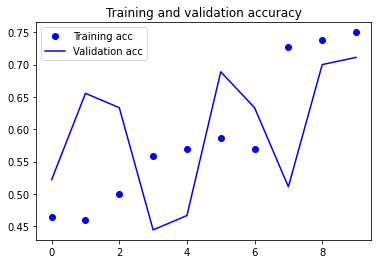

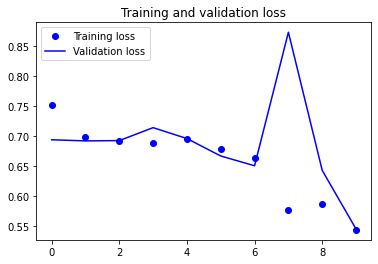

In [ ]:
#plot accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

It is overfitting as we see the Training accuracy is going up but the validation accuracy is not and the training loss is going down but the validation loss is not. Let us try Augmentation.

### Using Data Augmentation

I decide to Data Augmentation to see if the results improve. Data augmentation is nothing but ensuring that our model sees no images more than. once. We apply several transformations to rotate our images and then train our model. We do this to increase robustness.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=18, 
      epochs=10,
      validation_data=validation_generator,
      validation_steps=9) 

Found 182 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
Epoch 1/10
18/18 [==============================] - 18s 985ms/step - loss: 0.6429 - acc: 0.6570 - val_loss: 0.5873 - val_acc: 0.6556
Epoch 2/10
18/18 [==============================] - 17s 962ms/step - loss: 0.5989 - acc: 0.6919 - val_loss: 0.6246 - val_acc: 0.6667
Epoch 3/10
18/18 [==============================] - 17s 945ms/step - loss: 0.5677 - acc: 0.6860 - val_loss: 0.7447 - val_acc: 0.5889
Epoch 4/10
18/18 [==============================] - 17s 963ms/step - loss: 0.5786 - acc: 0.7209 - val_loss: 0.5428 - val_acc: 0.7778
Epoch 5/10
18/18 [==============================] - 18s 1s/step - loss: 0.5491 - acc: 0.7151 - val_loss: 0.6917 - val_acc: 0.6111
Epoch 6/10
18/18 [==============================] - 17s 960ms/step - loss: 0.5414 - acc: 0.7558 - val_loss: 0.5504 - val_acc: 0.7556
Epoch 7/10
18/18 [==============================] - 17s 1s/step - loss: 0.5430 - acc: 0.7500 - val_loss: 0.6252 - val_acc: 0

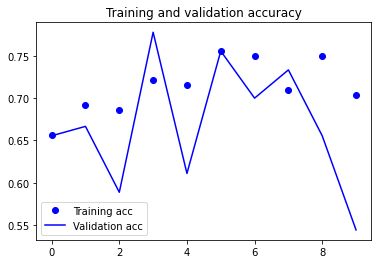

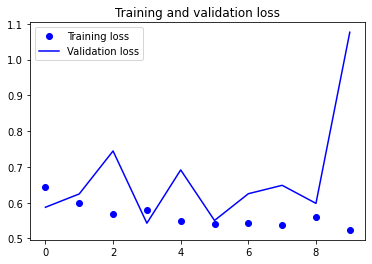

In [ ]:
#plot accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We observe that the validation accuracy is increasing with the training accuracy which is good but the training loss is increasing instead of decreasing. The curves are oscillating. I have tried increasing the epochs but no improvements have been observed.

In [ ]:
# to flatten the list
def flatten(l):
    return [item for sublist in l for item in sublist]

In [ ]:
import pandas as pd
my_results = pd.DataFrame(columns={'actual','pred'})
batches = 0
for x_val, y_val in validation_generator:
  batches=batches+1
  y_pred = model.predict(x_val)
  y_pred = flatten(y_pred)
  tmp = pd.DataFrame({'actual': y_val, 'pred': y_pred})
  my_results = my_results.append(tmp)
  if batches >= 90 // 18:  # it's the number of images and steps_per_epoch
    # break is added as otherwise generator loops indefinitely
    break

1/1 [==============================] - 0s 138ms/step


In [ ]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

              precision    recall  f1-score   support

         0.0       0.60      0.12      0.21        24
         1.0       0.53      0.92      0.68        26

    accuracy                           0.54        50
   macro avg       0.57      0.52      0.44        50
weighted avg       0.57      0.54      0.45        50



In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

[[ 3 21]
 [ 2 24]]


After data augmentation, we observe that our model has improved. On the validation set the model is giving 54% accuracy.

## Testing on Test set

Now we test our model in the test set.

In [ ]:
import time

start = time.time()
print("hello")

history = model.fit(
      train_generator,
      steps_per_epoch=18, # len(trainX) // BS 
      epochs=10,
      validation_data=test_generator,
      validation_steps=9)  # len(valX) // BS 
                           

end = time.time()
print(end - start)

hello
Epoch 1/10
18/18 [==============================] - 18s 974ms/step - loss: 0.5198 - acc: 0.7558 - val_loss: 0.6012 - val_acc: 0.6778
Epoch 2/10
18/18 [==============================] - 19s 1s/step - loss: 0.5375 - acc: 0.7326 - val_loss: 0.6648 - val_acc: 0.6556
Epoch 3/10
18/18 [==============================] - 17s 936ms/step - loss: 0.4861 - acc: 0.7849 - val_loss: 0.4726 - val_acc: 0.7889
Epoch 4/10
18/18 [==============================] - 17s 956ms/step - loss: 0.5566 - acc: 0.7442 - val_loss: 0.4766 - val_acc: 0.7556
Epoch 5/10
18/18 [==============================] - 17s 980ms/step - loss: 0.5317 - acc: 0.7442 - val_loss: 0.4284 - val_acc: 0.8000
Epoch 6/10
18/18 [==============================] - 17s 969ms/step - loss: 0.4816 - acc: 0.7442 - val_loss: 0.5550 - val_acc: 0.6667
Epoch 7/10
18/18 [==============================] - 17s 948ms/step - loss: 0.5224 - acc: 0.7326 - val_loss: 0.5654 - val_acc: 0.7111
Epoch 8/10
18/18 [==============================] - 17s 967ms/step

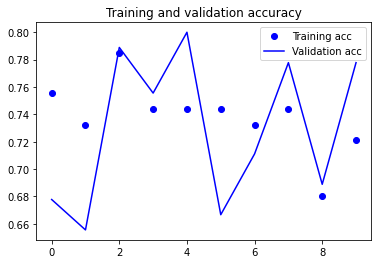

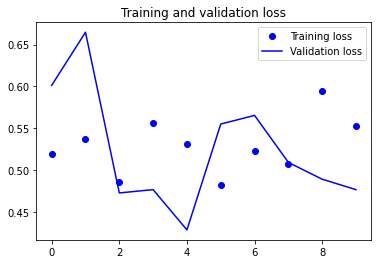

In [ ]:
# plot the accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and test loss')
plt.legend()

plt.show()

We can see that the curves are fluctuating.  

### Using Data Augmentation

Let us try data Augmentation to see if our results improve.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#only the train data is augmented
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=18, 
      epochs=10,
      validation_data=test_generator,
      validation_steps=9) 

Found 182 images belonging to 2 classes.
Found 90 images belonging to 2 classes.
Epoch 1/10
18/18 [==============================] - 18s 965ms/step - loss: 0.4941 - acc: 0.7558 - val_loss: 0.4569 - val_acc: 0.7000
Epoch 2/10
18/18 [==============================] - 17s 955ms/step - loss: 0.4405 - acc: 0.7674 - val_loss: 0.5072 - val_acc: 0.7111
Epoch 3/10
18/18 [==============================] - 17s 956ms/step - loss: 0.4576 - acc: 0.8023 - val_loss: 0.5544 - val_acc: 0.7222
Epoch 4/10
18/18 [==============================] - 17s 966ms/step - loss: 0.4580 - acc: 0.7733 - val_loss: 0.4583 - val_acc: 0.7667
Epoch 5/10
18/18 [==============================] - 17s 957ms/step - loss: 0.4876 - acc: 0.7849 - val_loss: 1.1040 - val_acc: 0.6222
Epoch 6/10
18/18 [==============================] - 18s 1s/step - loss: 0.5765 - acc: 0.6977 - val_loss: 0.6385 - val_acc: 0.6222
Epoch 7/10
18/18 [==============================] - 17s 949ms/step - loss: 0.5690 - acc: 0.6919 - val_loss: 0.5247 - val_acc

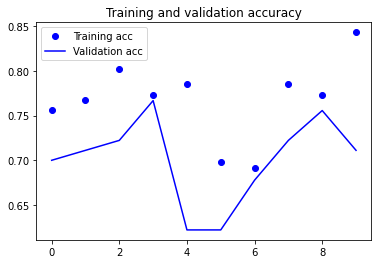

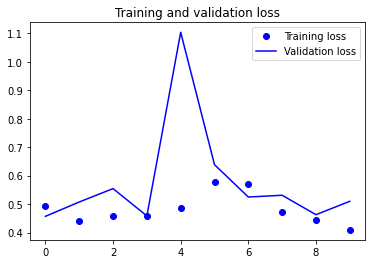

In [ ]:
# plot the accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and test loss')
plt.legend()

plt.show()

Hence the test accuracy is increasing except at the last point and the test loss is decreasing except at the last point.

In [ ]:
#function to flatten the list
def flatten(l):
    return [item for sublist in l for item in sublist]

In [ ]:
import pandas as pd
my_results = pd.DataFrame(columns={'actual','pred'})
batches = 0
for x_val, y_val in test_generator:
  batches=batches+1
  y_pred = model.predict(x_val)
  y_pred = flatten(y_pred)
  tmp = pd.DataFrame({'actual': y_val, 'pred': y_pred})
  my_results = my_results.append(tmp)
  if batches >= 90 // 18:  # it's the number of images and steps_per_epoch
    # we need to break the loop as otherwise generator loops indefinitely
    break

1/1 [==============================] - 0s 148ms/step


In [ ]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

              precision    recall  f1-score   support

         0.0       0.73      0.48      0.58        23
         1.0       0.66      0.85      0.74        27

    accuracy                           0.68        50
   macro avg       0.70      0.67      0.66        50
weighted avg       0.69      0.68      0.67        50



In [ ]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

[[11 12]
 [ 4 23]]


In the test set the model performed well and gave 74% accuracy.

# Conclusion


1.   The most important thing that I learnt in this assignment is how to load and prepare images of tigers and lions.
2.   After downloading I observed that all the files were not having uniform file formats. I had to remove the inconsistent file types to make my model work properly.
3. I learnt how to develop a convolutional neural netwrok model and with less sample size how my model easily overfits. I tried different combinations of hidden layers, with and without dropouts to see how our model is varying in its performance. I experimanted with different batch sizes and epochs to understand how these parameters are impacting our results. With increase in epochs I saw a decrease in my model accuracy.
4. Finally applied data augmentation to reduce the overfitting. The data augmentation is a method to give several transformations to our images so that our model never sees the same images more than once while training. This increases the robustness in our model and reduces overfitting.
5. In concusion, I can say that my model classified the lions and tigers in zoo with 54% accuracy and lions and tigers in Savanna with 74% accuracy. Also each time I run the script the results are changing as new images are getting downloaded.

